<a href="https://colab.research.google.com/github/Jee-9/Study/blob/main/PyTorch_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from PIL import Image

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import warnings
warnings.filterwarnings(action='ignore')

from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation
from tensorflow.keras.layers import add, Add

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [21]:
trans = transforms.Compose([
                            transforms.Resize((64,64)),
                            transforms.ToTensor(), 
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/CNN_model_training_data', transform = trans)

In [10]:
print(trainset.__getitem__(5))

(tensor([[[0.2235, 0.2353, 0.2471,  ..., 0.3373, 0.3255, 0.3216],
         [0.2235, 0.2353, 0.2471,  ..., 0.3059, 0.2824, 0.2824],
         [0.2275, 0.2353, 0.2471,  ..., 0.2745, 0.2667, 0.2902],
         ...,
         [0.1608, 0.1255, 0.1216,  ..., 0.2510, 0.2549, 0.2549],
         [0.1647, 0.1294, 0.1098,  ..., 0.1882, 0.2431, 0.2549],
         [0.1608, 0.1373, 0.1333,  ..., 0.1294, 0.2157, 0.2588]],

        [[0.3765, 0.3882, 0.4000,  ..., 0.4745, 0.4745, 0.4745],
         [0.3765, 0.3882, 0.4000,  ..., 0.4471, 0.4745, 0.4784],
         [0.3804, 0.3882, 0.4000,  ..., 0.4039, 0.4667, 0.4902],
         ...,
         [0.2471, 0.1333, 0.1294,  ..., 0.3765, 0.4314, 0.4314],
         [0.2549, 0.1373, 0.1176,  ..., 0.2392, 0.4039, 0.4314],
         [0.2588, 0.1451, 0.1412,  ..., 0.1490, 0.3529, 0.4353]],

        [[0.2706, 0.2824, 0.2941,  ..., 0.3804, 0.3922, 0.3922],
         [0.2706, 0.2824, 0.2941,  ..., 0.3490, 0.4902, 0.5255],
         [0.2745, 0.2824, 0.2941,  ..., 0.3098, 0.5059, 0

In [11]:
classes = trainset.classes
classes

['edu', 'game', 'kpop', 'mb']

In [14]:
trainloader = DataLoader(trainset,
                         batch_size=10,
                         shuffle = True,
                         num_workers=4)

In [17]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

tensor([2, 0, 0, 1, 1, 3, 2, 3, 0, 3])


In [15]:
def imshow(img):
  img = img /2 + 0.5 #unnormalize
  np_img = img.numpy()
  #plt.imshow(np_img)
  plt.imshow(np.transpose(np_img, (1,2,0)))

  print(np_img.shape)
  print((np.transpose(np_img, (1,2,0))).shape)

torch.Size([10, 3, 32, 32])
(3, 70, 172)
(70, 172, 3)
torch.Size([10, 3, 32, 32])
torch.Size([3, 70, 274])
 kpop   edu   edu  game  game    mb  kpop    mb   edu    mb 


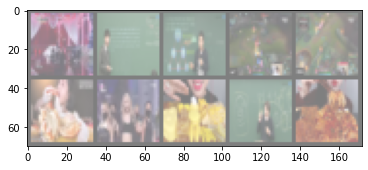

In [22]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow = 5))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]]for j in range(10)))

In [23]:
import torchvision.models.resnet as resnet


In [ ]:
class ResNet(nn.Module):
  def __init__(self, block, layers, num_classes=4, zero_init_residual=True):
    super(ResNet, self).__init__()
    # self.inplanes = 32 # conv1에서 나올 채널의 차원, 이미지넷보다 작은 데이터라 32로 조정

    # inputs = 3*64*64
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False)
    self.bn1 = nn.BatchNorm2d(32)
    self.relu = nn.ReLU(inplace = True)
    self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    

- reference : https://inhovation97.tistory.com/39